# pandas 분석3

## 지리정보(geospatial data)

In [1]:
!pip install folium

In [1]:
import folium
# folium을 통해서 Leaflet map을 시각화 할 수 있도록 도와 준다.
# Leaflet : 자바스크립트 지도 라이브러리

[folium v.0.6.0 document link](https://python-visualization.github.io/folium/docs-v0.6.0/)

In [2]:
a = folium.Map(location = [37.5665, 126.9780], tiles='Stamen Terrain') #지도 객체 생성
# location [위도, 경도]

tiles는  
 -“OpenStreetMap”  
 -“Mapbox Bright” (Limited levels of zoom for free tiles)  
 -“Mapbox Control Room” (Limited levels of zoom for free tiles)  
 -“Stamen” (Terrain, Toner, and Watercolor)  
 -“Cloudmade” (Must pass API key)  
 -“Mapbox” (Must pass API key)  
 -“CartoDB” (positron and dark_matter)  

In [3]:
a

folium.Marker(location, popup, icon).add_to(map)  
지도 상에 마커를 추가하는 함수이다.

In [4]:
folium.Marker([37.5248, 126.9780], popup='<i>Mt.Hood Meadows</i>', icon = folium.Icon(icon='cloud')).add_to(a)
# 위도 37.5249, 경도 126.9780에 위치하고 구름 아이콘을 지니며, 클릭시 팝업으로 Mt.Hood Meadows가 뜬다.

In [5]:
folium.Marker([37.5311, 126.9113], popup='<b>Timberline Lodge</b>').add_to(a)
# 위도 37.5311, 경도 126.9113에 Timverline Lodge 팝업이 뜨는 마커 추가

In [6]:
a

In [7]:
folium.features.Circle(radius=100, location=[37.5248, 126.9375], popup='The waterfront', color='crimson', fill=False).add_to(a)
# radius(반지름) 100미터, 위도 37.5248 경도 126.9375, 팝업으로 The waterfront가 뜨며 
# color는 crimson(거의 빨간색)이며, 채워지지 않은 원을 추가한다.

In [8]:
folium.features.CircleMarker(location=[37.5311, 126.9113], radius=50, popup='Laurelhurst Park', color='#3186cc', fill=True, fill_color='#3186cc').add_to(a)
# 원으로된 마커를 추가한다.

In [9]:
a

In [10]:
folium.features.PolygonMarker(locations=[[35.900435, 128.398652], [35.613408, 128.380706],[35.720165, 128.678551],[35.899461, 128.759182],[36.014757, 128.703875]], popup='대구', color='#3186cc', fill_color='#3186cc').add_to(a)
# 다각형 마커를 그려준다. (5각형으로 대구쪽에 마커를 지정해주었다.)

In [11]:
a

In [12]:
m = folium.Map(location=[37.5665, 126.9780], tiles = 'Stamen Terrain').add_child(folium.LatLngPopup())
# 새로운 지도 객체 -> add_child()를 통해서 팝업으로 위도(Latitude) 경도(Longtitude)가 뜨도록 했다.

In [13]:
m

In [14]:
m = folium.Map(location= [37.5665, 126.9780], tiles = 'Stamen Terrain').add_child(folium.ClickForMarker(popup="ClickPoint"))
# 위처럼 add_child()를 통해서 클릭한 부분에 팝업으로 마커를 띄우도록 했다.

In [15]:
m

In [16]:
m8 = folium.Map(location= [37.5665, 126.9780], tiles = 'Stamen Terrain')

folium.RegularPolygonMarker(location = [37.5665, 126.9780], fill_color='#c42b17', radius=50, popup=folium.Popup(max_width=450)).add_to(m8)

In [17]:
m8

In [18]:
!pip install pdvega

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


pdvega는 Pandas DataFrame에서 Vega-Lite plot들을 빠르게 만들 수 있도록 해주는 라이브러리

In [18]:
import seaborn as sns
import pandas as pd
import pdvega
import json

In [19]:
data = sns.load_dataset('iris', engine='python')

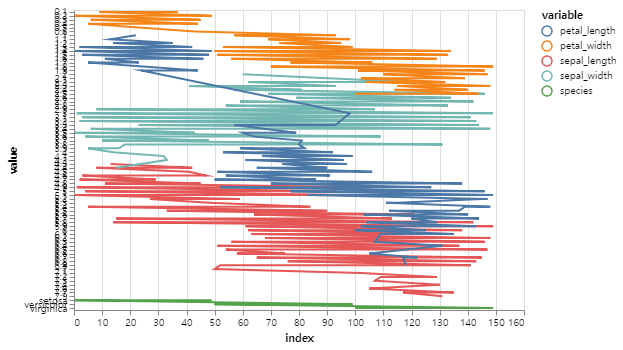

In [20]:
data.vgplot.line()

Map에 다각형 마커 띄우기

In [21]:
folium.RegularPolygonMarker([37.5665, 126.9780], fill_color = 'blue', radius = 50, popup = folium.Popup(max_width=450).add_child(folium.Vega(json.load(open('vega.json', encoding='utf-8-sig'), encoding='utf-8-sig'), width = 450, height=250))).add_to(m)
# 다각형 마커와 함께 팝업으로 json파일의 내용을 보여줄 수 있다.

# folium.RegularPolygonMarker([37.4665, 126.9780], fill_color = 'black', radius = 40, popup = folium.Popup(max_width=500).add_child(folium.Vega(json.load(open('vis2.json')), width = 400, height=250))).add_to(m)
m

Map에 layer 씌우기

In [22]:
m9 = folium.Map(location = [37.5665, 126.9780], tiles = 'Mapbox Bright')

seoul_geo_json = r'seoul_municipalities_geo_simple.json'
seoul_topo_json = r'seoul_municipalities_topo.json'

folium.GeoJson(open(seoul_geo_json, encoding='utf-8-sig').read(), name='geojson').add_to(m9)
# GeoJson 객체를 지도에 띄운다.
# 어떠한 json 파일을 읽어서 지도에 추가해줌.
folium.TopoJson(open(seoul_topo_json, encoding='utf-8-sig'), "objects.seoul_municipalities_geo", name='topojson', ).add_to(m9)
# TopoJson 객체를 지도에 띄운다.
# "objects.seoul_municipalities_geo"는 TopoJson 구조내에 원하는 객체의 주소이다.

folium.LayerControl().add_to(m9)
# 위에 2가지의 layer를 만들었기 때문에 Layer를 제어할 수 있는 창을 추가해준다.

In [23]:
m9

Choropleth map 만들기

Choropleth map은 통계적으로 척도(measurement)에 대한 비율(proportion)에 대해서 shading해주어서 나타내어주는 지도 이다.

In [48]:
m10 = folium.Map(location = [37.5665, 126.9780], tiles = "OpenStreetMap")

seoul_geo_json = 'seoul_municipalities_geo_simple.json' # Seoul 구별 구역에 대한 정보가진 json 파일
seoul_geo_df = pd.read_csv('seoul_geo_df.csv', encoding='utf-8-sig') # 구별 인구 정보를 가진 csv파일
m10.choropleth(geo_data=open(seoul_geo_json, encoding='utf-8-sig').read(),
               name= 'choropleth', data = seoul_geo_df, 
               columns = ['sig_eng_nm','population'],
               key_on='feature.properties.SIG_ENG_NM',
               fill_color='PuBu', threshold_scale=[200000,300000,400000,500000,600000,700000],
               fill_opacity=0.5,
               line_opacity=0.2,
               highlight=True, legend_name='population (명)')
#

folium.LayerControl().add_to(m10)
m10.save('choropleth.html') # html 파일로 저장해준다.

In [25]:
seoul_geo_df.head()

,sig_eng_nm,population
0,Jongno-gu,160070
1,Jung-gu,130465
2,Yongsan-gu,239740
3,Seongdong-gu,299337
4,Gwangjin-gu,368927


In [26]:
m10

In [27]:
!pip freeze

alabaster==0.7.10
anaconda-client==1.6.5
anaconda-navigator==1.6.9
anaconda-project==0.8.0
asn1crypto==0.22.0
astroid==1.5.3
astropy==2.0.2
babel==2.5.0
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.0
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==1.5.0
bokeh==0.12.10
boto==2.48.0
Bottleneck==1.2.1
branca==0.3.0
builtwith==1.3.3
CacheControl==0.12.3
certifi==2018.4.16
cffi==1.10.0
chardet==3.0.4
click==6.7
click-plugins==1.0.3
cligj==0.4.0
cloudpickle==0.4.0
clyent==1.2.2
colorama==0.3.9
comtypes==1.1.2
conda==4.5.9
conda-build==3.0.27
conda-verify==2.0.0
contextlib2==0.5.5
cryptography==2.0.3
cssselect==1.0.3
cycler==0.10.0
Cython==0.26.1
cytoolz==0.8.2
dash==0.26.0
dash-renderer==0.13.2
dask==0.15.3
datashape==0.5.4
decorator==4.1.2
descartes==1.1.0
distlib==0.2.5
distributed==1.19.1
docutils==0.14
entrypoints==0.2.3
enum34==1.1.6
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==2.0.12
findspark==1.3.0
Fiona==1.7.10
Flask==0.12.2
Flask-Compress==1.4.0
Flask-Cors==3.0

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
import geopandas

geopandas는 지도 데이터를 쉽게 다룰 수 있도록 해주는 오픈 소스 프로젝트이다.  
geometric타입에서 pandas가 지도에 대한 operation을 할 수 있도록 해준다.

In [29]:
dir(geopandas)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'base',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'overlay',
 'pd',
 'plotting',
 'read_file',
 'read_postgis',
 'sjoin',
 'tools']

In [31]:
import pandas as pd
import numpy as np
crime = pd.read_hdf('crime.h5')

In [32]:
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
5,violation-of-restraining-order,all-other-crimes,2014-06-29 04:22:00,-104.972447,39.739449,cheesman-park,1,0
6,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:56:00,-105.052956,39.733315,villa-park,0,1
7,assault-dv,other-crimes-against-persons,2014-06-29 04:54:00,-104.994621,39.746857,cbd,1,0
8,criminal-mischief-mtr-veh,public-disorder,2014-01-20 08:29:00,-104.977522,39.781310,globeville,1,0
9,criminal-trespassing,all-other-crimes,2014-06-29 03:56:00,-104.956140,39.741610,city-park,1,0


In [33]:
crime2 = crime[['OFFENSE_TYPE_ID', 'GEO_LON', 'GEO_LAT']]

In [ ]:
# crime2.mean()

In [34]:
crime2[['GEO_LON', 'GEO_LAT']].apply(np.mean, axis=0)

GEO_LON   -104.949973
GEO_LAT     39.726061
dtype: float64

In [35]:
crime3 = crime2.head(100)

In [36]:
a = crime3.to_dict() # DataFrame형식의 객체를 Dict타입으로 변환해준다.

In [37]:
a

{'GEO_LAT': {0: 39.7457528,
  1: 39.738702,
  2: 39.7066742,
  3: 39.7695051,
  4: 39.6792288,
  5: 39.7394495,
  6: 39.7333151,
  7: 39.7468574,
  8: 39.7813097,
  9: 39.7416099,
  10: 39.6931081,
  11: 39.6967456,
  12: 39.7316251,
  13: 39.7776069,
  14: 39.7597601,
  15: 39.6782158,
  16: 39.7619653,
  17: 39.7243111,
  18: 39.6975156,
  19: 39.7376596,
  20: 39.7679454,
  21: 39.7404354,
  22: 39.6785607,
  23: 39.6886287,
  24: 39.7584654,
  25: 39.6799772,
  26: 39.675251,
  27: 39.648909,
  28: 39.7400108,
  29: 39.7839773,
  30: 39.7361941,
  31: 39.7458598,
  32: 39.7864892,
  33: 39.7864892,
  34: 39.7397729,
  35: 39.677701,
  36: 39.6893431,
  37: 39.6169394,
  38: 39.7730795,
  39: 39.7802079,
  40: 39.7677096,
  41: 39.6813879,
  42: 39.728212,
  43: 39.7518797,
  44: 39.7015986,
  45: 39.6757048,
  46: 39.6764064,
  47: 39.7864892,
  48: 39.7864892,
  49: 39.7504766,
  50: 39.6789022,
  51: 39.7666933,
  52: 39.7043466,
  53: 39.7686411,
  54: 39.7079763,
  55: 39.76213

지도에 여러개의 Customizing 마커를 한번에 넣기

In [40]:
x = crime3.to_records(index=False) 
# DataFrame타입 객체를 Numpy record array객체로 변환해줌.

In [41]:
x

rec.array([('traffic-accident-dui-duid', -105.0001487,  39.7457528),
           ('vehicular-eluding-no-chase', -104.8846604,  39.738702 ),
           ('disturbing-the-peace', -105.0207185,  39.7066742),
           ('curfew', -105.0015518,  39.7695051),
           ('aggravated-assault', -105.0185574,  39.6792288),
           ('violation-of-restraining-order', -104.9724467,  39.7394495),
           ('traffic-accident-dui-duid', -105.0529565,  39.7333151),
           ('assault-dv', -104.9946215,  39.7468574),
           ('criminal-mischief-mtr-veh', -104.9775221,  39.7813097),
           ('criminal-trespassing', -104.9561402,  39.7416099),
           ('traffic-accident-hit-and-run', -105.0250647,  39.6931081),
           ('traffic-accident', -105.0250614,  39.6967456),
           ('theft-from-bldg', -104.9345359,  39.7316251),
           ('theft-parts-from-vehicle', -104.9223848,  39.7776069),
           ('burglary-residence-no-force', -104.9297169,  39.7597601),
           ('traffic-acci

In [72]:
marker = []
import math
for i in x:
    if (not math.isnan(i[1]))  or (not math.isnan(i[2])): # nan 값이 있기 때문에 걸러줌.
        b = {'icon':'http://maps.google.com/mapfiles/ms/icons/green-dot.png', 'lat':i[1], 'lng':i[2] }
        marker.append(b) # dict 타입으로 리스트내에 넣어줌.
# x에서 lat, lng 값을 가져와서 marker list에 넣어준다.
# 이렇게 많은 마커들을 넣고 싶을 때 유용하다.

m11 = folium.Map(location = [39.7457528,-105.0001487], tiles = "OpenStreetMap") #folium 맵 객체 생성
for i in marker:
    folium.Marker([i['lng'], i['lat']], popup='<i>Mt.Hood Meadows</i>', icon = folium.CustomIcon(i['icon'])).add_to(m11)
# 여러개의 마커들을 for문을 통해서 넣어준다.

In [73]:
m11

In [46]:
crime2['OFFENSE_TYPE_ID'].unique()
# unique()를 통해서 중복되는 것들을 빼줄 수 있다.

[traffic-accident-dui-duid, vehicular-eluding-no-chase, disturbing-the-peace, curfew, aggravated-assault, ..., riot, theft-from-yards, theft-of-cable-services, explosives-posses, homicide-solicitation]
Length: 196
Categories (196, object): [traffic-accident-dui-duid, vehicular-eluding-no-chase, disturbing-the-peace, curfew, ..., theft-from-yards, theft-of-cable-services, explosives-posses, homicide-solicitation]

예제로 한번 해보자.

In [115]:
markers=[
            {
                'icon': 'http://maps.google.com/mapfiles/ms/icons/green-dot.png',
                'lat': 35.881544,
                'lng': 128.586207,
                'infobox': "<h5>대구시민운동장야구장 삼성라이온즈 No.21 오승환</h5><img src='http://dimg.donga.com/wps/SPORTS/IMAGE/2012/06/10/46902896.2.jpg' />"
            },
            {
                'icon': 'http://maps.google.com/mapfiles/ms/icons/blue-dot.png',
                'lat': 34.721387,
                'lng': 135.361573,
                'infobox': "<h5> 한신타이거즈 No.22 오승환</h5><img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGv50XRADE5WuycAliBCFmzBt4D-QzZHFbAkMbVxxKsGmZZiJF' />"
            },
            {
                'icon': 'http://maps.google.com/mapfiles/ms/icons/yellow-dot.png',
                'lat': 38.622636,
                'lng': -90.192821,
                'infobox': "<h5> 세인트루이스카디널스 No.26 오승환</h5><img src='http://t1.daumcdn.net/liveboard/sportsvod/f3af94b0f4234bc79f3af43927c55c14.jpg' />"
            },
            {
                'icon': 'http://maps.google.com/mapfiles/ms/icons/blue-dot.png',
                'lat': 43.641492,
                'lng': -79.389353,
                'infobox': "<h5> 토론토블루제이스 No.22 오승환</h5><img src='http://image.chosun.com/sitedata/image/201803/30/2018033000913_0.jpg' />"
            },
            {
                'icon': 'http://maps.google.com/mapfiles/ms/icons/yellow-dot.png',
                'lat': 39.755915,
                'lng': -104.994178,
                'infobox': "<h5> 콜로라도로키스 No.18 오승환</h5><img src='http://img.khan.co.kr/news/2018/07/29/l_2018073001003432600283631.jpg' />"
            }
        ]

In [122]:
m12 = folium.Map(location = [39.7457528,-105.0001487], tiles = "OpenStreetMap", zoom_start=1) #folium 맵 객체 생성
for i in markers:
    folium.Marker([i['lat'], i['lng']], popup=folium.Popup(folium.IFrame(i['infobox'], width=200, height=200), max_width=200), icon = folium.CustomIcon(i['icon'])).add_to(m12)
# 여러개의 마커들을 for문을 통해서 넣어준다.

In [123]:
m12